In [1]:
# define universe
#f = 'KOSPI200 F201812 181010'
#f = 'K200 F 201903 190219'
f = 'KOSPI200 F201906 190426'
p_name = 'KOSPI 200 F'
pair = ['K200', 'K200F']
cd = pair[0]

# trading strategy determinants
threshold = 0.001   # percent

path = './data/'

In [2]:
import pandas as pd
import finterstellar as fs

In [3]:
ld = fs.LoadData()
df = ld.read_intraday_csv(path, f)

In [4]:
df.tail()

,K200,K200F,Value,Basis
Time,,,,
15:32:00,281.34,281.90,282.04,0.56
15:33:00,281.34,281.90,282.04,0.56
15:34:00,281.34,281.85,282.04,0.51
15:35:00,281.34,281.90,282.04,0.56
15:46:00,281.34,281.75,282.04,0.41


In [5]:
valuation = fs.Valuation()
trd = fs.IntradayFuturesTradeOnValue()

r = 0.02
d = 0.005
t0 = pd.to_datetime('2019-04-26')
T = pd.to_datetime('2019-06-13')

sample = trd.expected_y(df, pair, r, d, t0, T)
sample = trd.price_analyze(df, threshold, pair)
book = trd.create_trade_book(df, pair)
book = trd.tradings(df, book, threshold, pair)
book = trd.position(book, pair)
fund_rtn = trd.returns(book, pair, display=True)
bm_rtn = trd.benchmark_return(book, pair)
exs_rtn = trd.excess_return(fund_rtn, bm_rtn)

         K200  K200F  Value  Basis  K200F expected  K200F spread
cheaper                                                         
E         121    122    122    122             121           121
K200      273    273    273    273             273           273
K200F       1      1      1      1               1             1
09:01:00 long K200F 281.8
09:02:00 long K200F 281.8  | unwind long K200F 281.85  | return: 1.0002
09:04:00 short K200F 281.85  | unwind short K200F 280.85  | return: 1.0035
09:05:00 short K200F 281.4
09:10:00 short K200F 281.4  | unwind short K200F 281.55  | return: 0.9995
09:13:00 short K200F 281.3
09:20:00 short K200F 281.3  | unwind short K200F 281.25  | return: 1.0002
09:23:00 short K200F 281.05
09:26:00 short K200F 281.05  | unwind short K200F 281.1  | return: 0.9998
09:27:00 short K200F 281.15
09:31:00 short K200F 281.15  | unwind short K200F 281.15  | return: 1.0
09:36:00 short K200F 280.85
09:37:00 short K200F 280.85  | unwind short K200F 280.8  | return: 1.0

In [6]:
now = sample.index[-1]
trading_strategy = trd.trading_strategy(sample, threshold, pair, now)
position_strategy = trd.position_strategy(book, pair, now)

As of 15:46:00 this model suggests you to do nothing
As of 15:46:00 your model portfolio ['K200', 'K200F'] needs to be composed of nothing


In [7]:
v = fs.VisualizeIntraday()

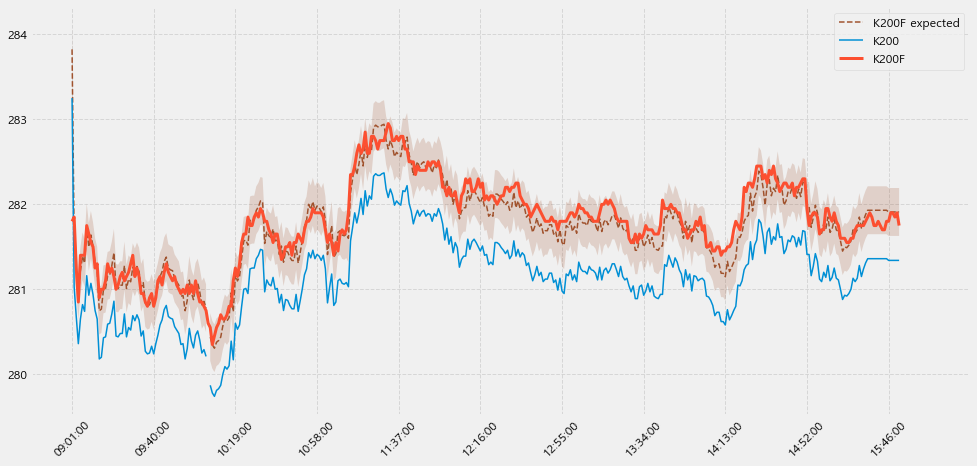

In [8]:
v.pair_trend_price_view(sample, threshold, pair)

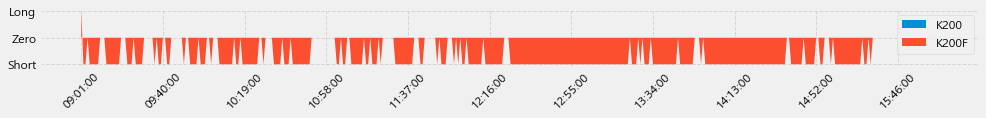

In [9]:
v.position_view(book, pair)